In [0]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns


# Random Noise Gaussian




In [0]:
no_structure = np.random.rand(1000, 2)

plt.scatter(no_structure[:,0], no_structure[:,1])
plt.show()


# Non Spherical Data


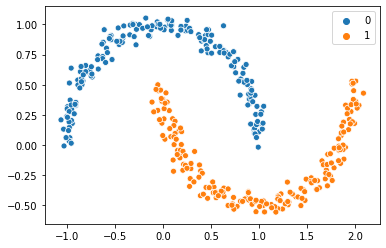

In [0]:
from sklearn.datasets import make_moons
X_MOON, labels_MOON = make_moons(375, noise=.05, random_state=0)
plt.scatter(X_MOON[:,0], X_MOON[:,1])
plt.show()

#Perfect Labeling
ax = sns.scatterplot(x=X_MOON[:,0], y=X_MOON[:,1], hue=labels_MOON)

# Many Clusters Close


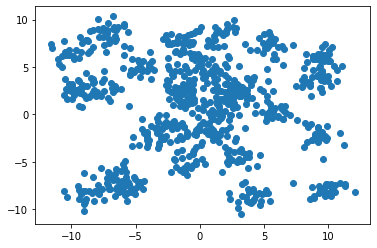

In [0]:
from sklearn.datasets import make_blobs
X_close,y_close = make_blobs(centers=30, n_samples=800, random_state=0, cluster_std=0.85)

plt.scatter(X_close[:,0], X_close[:,1])
plt.show()

# Different Cluster Sizes

In [0]:
center1 = (30, 30)
center2 = (80, 20)
center3= (60,80)
distance = 15


x1 = np.random.uniform(center1[0], center1[0] + distance, size=(250,))
y1 = np.random.normal(center1[1], distance, size=(250,)) 

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(25,))
y2 = np.random.normal(center2[1], distance, size=(25,)) 

x3 = np.random.uniform(center3[0], center3[0] + distance, size=(100,))
y3 = np.random.normal(center3[1], distance, size=(100,)) 

x_size = np.append(x1,np.append(x2,x3))
y_size = np.append(y1,np.append(y2,y3))
plt.scatter(x_size, y_size)
plt.show()


#Ideal Clustering

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3,y3)
plt.show()


# Different Cluster Densities


In [0]:
#different sizes
center1 = (30, 30)
center2 = (80, 20)
center3 = (70,80)
distance = 10
distance1 = 30

x1 = np.random.uniform(center1[0], center1[0] + distance1, size=(75,))
y1 = np.random.normal(center1[1], distance1, size=(75,)) 

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(75,))
y2 = np.random.normal(center2[1], distance, size=(75,)) 

x3 = np.random.uniform(center3[0], center3[0] + distance, size=(75,))
y3 = np.random.normal(center3[1], distance, size=(75,)) 

x_dense = np.append(x1,np.append(x2,x3))
y_dense = np.append(y1,np.append(y2,y3))
plt.scatter(x_dense, y_dense)
plt.show()

#Ideal Clustering

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3,y3)
plt.show()





# KMEANS CLUSTERING


In [0]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Preassembly
df_noise     = DataFrame(no_structure,columns=['x','y'])
df_spherical = DataFrame(X_MOON,columns=['x','y'])
df_manyclose = DataFrame(X_close,columns=['x','y'])
data_size = {'x': x_size, 'y': y_size}
df_sizediff  = DataFrame(data_size,columns=['x','y'])
data_dense = {'x': x_dense, 'y': y_dense}
df_densedifv = DataFrame(data_dense,columns=['x','y'])


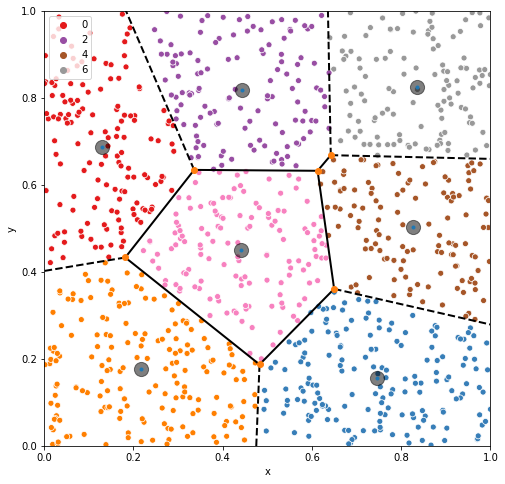

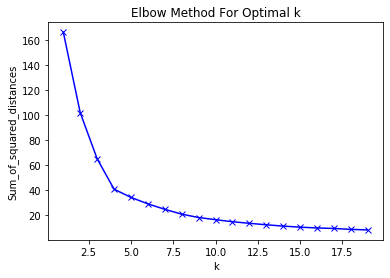

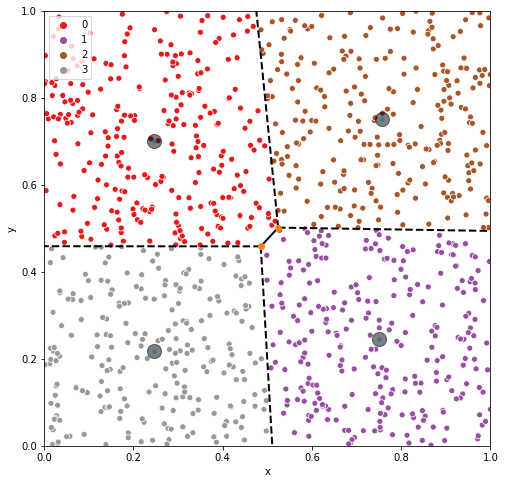

In [0]:
from scipy.spatial import Voronoi, voronoi_plot_2d 


fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=7).fit(df_noise)
ax = sns.scatterplot(x=df_noise['x'], y=df_noise['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_noise) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 
plt.xlim(0,1)
plt.ylim(0,1)
plt.show() 



Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters= k).fit(df_noise)
    km = km.fit(df_noise)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Elbopoint at 4 !


fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=4).fit(df_noise)
ax = sns.scatterplot(x=df_noise['x'], y=df_noise['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_noise) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 
plt.xlim(0,1)
plt.ylim(0,1)
plt.show() 


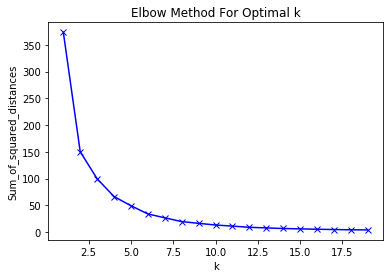

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=2).fit(df_spherical)
ax = sns.scatterplot(x=df_spherical['x'], y=df_spherical['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_spherical) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
#vor = Voronoi(centers) 
#voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_spherical['x']),max(df_spherical['x'])  
min_y,max_y = min(df_spherical['y']),max(df_spherical['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 



Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters= k).fit(df_spherical)
    km = km.fit(df_spherical)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#Elbopoint at 4 !
fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=4).fit(df_spherical)
ax = sns.scatterplot(x=df_spherical['x'], y=df_spherical['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_spherical) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_spherical['x']),max(df_spherical['x'])  
min_y,max_y = min(df_spherical['y']),max(df_spherical['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


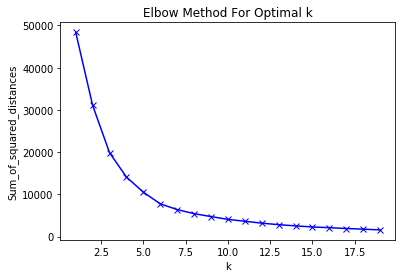

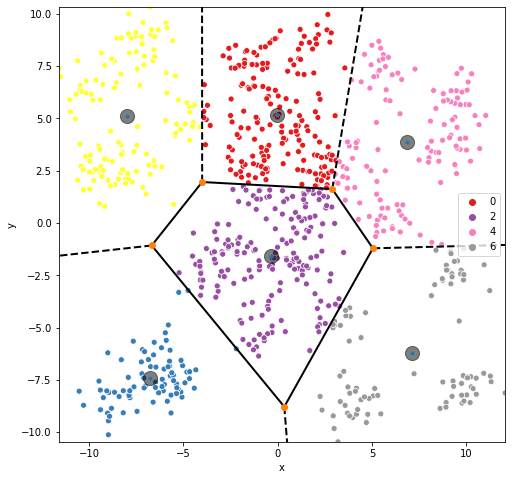

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=14).fit(df_manyclose)
ax = sns.scatterplot(x=df_manyclose['x'], y=df_manyclose['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_manyclose) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_manyclose['x']),max(df_manyclose['x'])  
min_y,max_y = min(df_manyclose['y']),max(df_manyclose['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 



Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters= k).fit(df_manyclose)
    km = km.fit(df_manyclose)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=6).fit(df_manyclose)
ax = sns.scatterplot(x=df_manyclose['x'], y=df_manyclose['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_manyclose) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_manyclose['x']),max(df_manyclose['x'])  
min_y,max_y = min(df_manyclose['y']),max(df_manyclose['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 

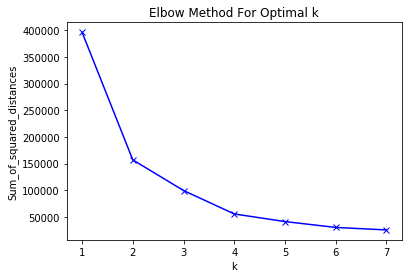

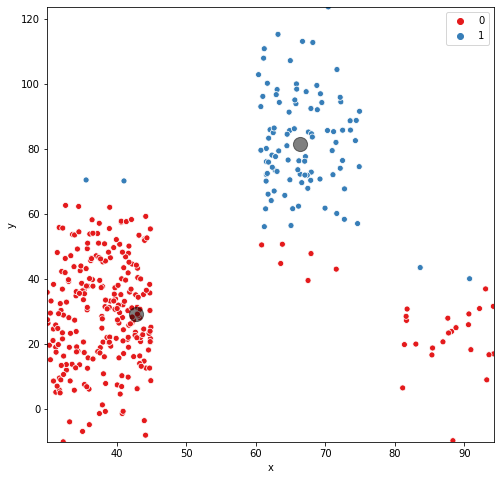

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=3).fit(df_sizediff)
ax = sns.scatterplot(x=df_sizediff['x'], y=df_sizediff['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_sizediff) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_sizediff['x']),max(df_sizediff['x'])  
min_y,max_y = min(df_sizediff['y']),max(df_sizediff['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters= k).fit(df_sizediff)
    km = km.fit(df_sizediff)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=2).fit(df_sizediff)
ax = sns.scatterplot(x=df_sizediff['x'], y=df_sizediff['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_sizediff) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
# Cannot plot voroni if only two points!
#vor = Voronoi(centers) 
#voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_sizediff['x']),max(df_sizediff['x'])  
min_y,max_y = min(df_sizediff['y']),max(df_sizediff['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


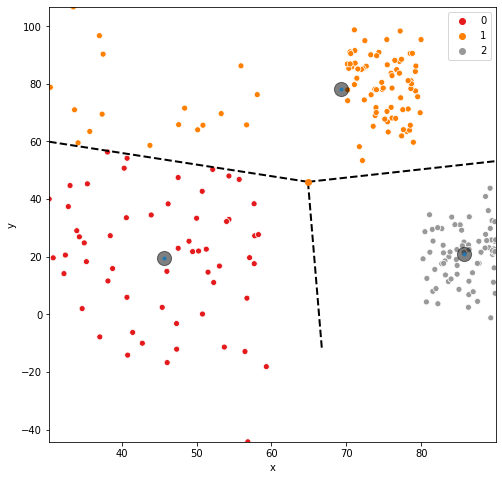

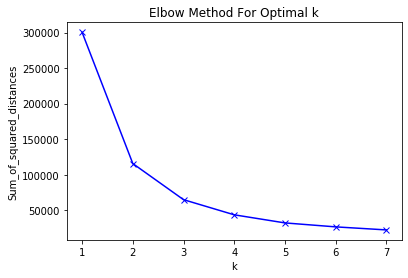

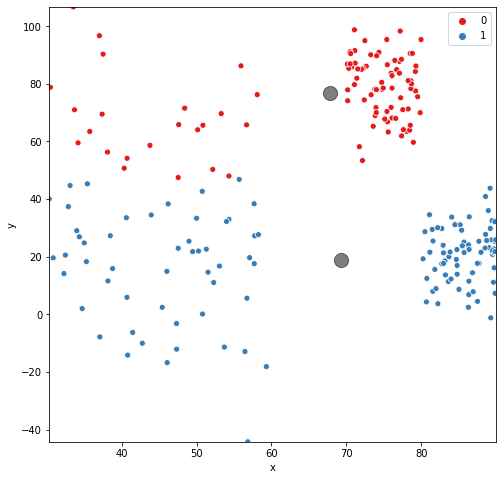

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=3).fit(df_densedifv)
ax = sns.scatterplot(x=df_densedifv['x'], y=df_densedifv['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_densedifv) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_densedifv['x']),max(df_densedifv['x'])  
min_y,max_y = min(df_densedifv['y']),max(df_densedifv['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters= k).fit(df_densedifv)
    km = km.fit(df_densedifv)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=2).fit(df_densedifv)
ax = sns.scatterplot(x=df_densedifv['x'], y=df_densedifv['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_densedifv) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
#vor = Voronoi(centers) 
#voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

min_x,max_x = min(df_densedifv['x']),max(df_densedifv['x'])  
min_y,max_y = min(df_densedifv['y']),max(df_densedifv['y'])  



plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 



# Hierachical Clustering



In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

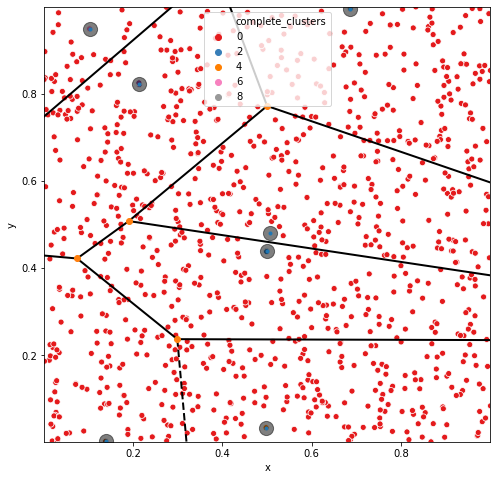

In [0]:
k = 7
X = df_noise
z_single = linkage(X, 'single')
z_complete = linkage(X, 'complete')

single_clusters = fcluster(z_single, k, criterion='maxclust')
complete_clusters = fcluster(z_complete, k, criterion='maxclust')

X["single_clusters"]   = single_clusters
X["complete_clusters"] = complete_clusters

clusters = range(1,(k+1))
centers_single = []
centers_complete = []
for i in clusters:

  #single linkage
  sub = X.loc[X['single_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_single.append(list(center))


  #complete linkage
  sub = X.loc[X['complete_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_complete.append(list(center))

 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["single_clusters"],  palette="Set1",ax=ax)

vor = Voronoi(centers_single) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 

lst0 = [item[0] for item in centers_single]
lst1 = [item[1] for item in centers_single]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 



 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["complete_clusters"],  palette="Set1",ax=ax)

vor = Voronoi(centers_complete) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 

lst0 = [item[0] for item in centers_complete]
lst1 = [item[1] for item in centers_complete]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


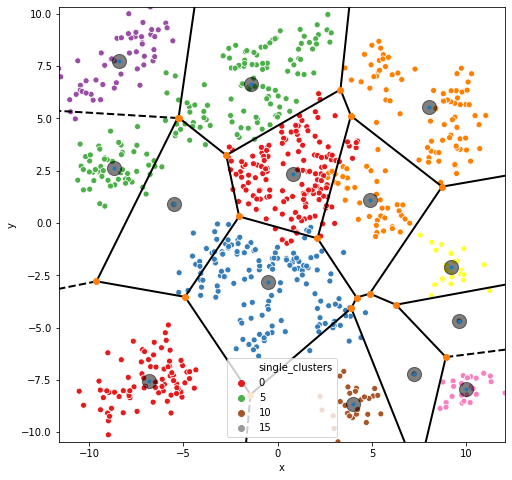

In [0]:

k = 14
X = df_manyclose
z_single = linkage(X, 'single')
z_complete = linkage(X, 'complete')

single_clusters = fcluster(z_single, k, criterion='maxclust')
complete_clusters = fcluster(z_complete, k, criterion='maxclust')

X["single_clusters"]   = single_clusters
X["complete_clusters"] = complete_clusters
clusters = range(1,(k+1))
centers_single = []
centers_complete = []
for i in clusters:

  #single linkage
  sub = X.loc[X['single_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_single.append(list(center))


  #complete linkage
  sub = X.loc[X['complete_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_complete.append(list(center))

 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["single_clusters"],  palette="Set1",ax=ax)

vor = Voronoi(centers_single) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 

lst0 = [item[0] for item in centers_single]
lst1 = [item[1] for item in centers_single]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 



 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["complete_clusters"],  palette="Set2",ax=ax)

vor = Voronoi(centers_complete) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 

lst0 = [item[0] for item in centers_complete]
lst1 = [item[1] for item in centers_complete]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 




In [0]:
k = 2 
X = df_spherical
z_single = linkage(X, 'single')
z_complete = linkage(X, 'complete')

single_clusters = fcluster(z_single, k, criterion='maxclust')
complete_clusters = fcluster(z_complete, k, criterion='maxclust')

X["single_clusters"]   = single_clusters
X["complete_clusters"] = complete_clusters
clusters = range(1,(k+1))
centers_single = []
centers_complete = []
for i in clusters:

  #single linkage
  sub = X.loc[X['single_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_single.append(list(center))


  #complete linkage
  sub = X.loc[X['complete_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_complete.append(list(center))

 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["single_clusters"],  palette="Set1",ax=ax)


lst0 = [item[0] for item in centers_single]
lst1 = [item[1] for item in centers_single]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 



 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["complete_clusters"],  palette="Set2",ax=ax)



lst0 = [item[0] for item in centers_complete]
lst1 = [item[1] for item in centers_complete]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 




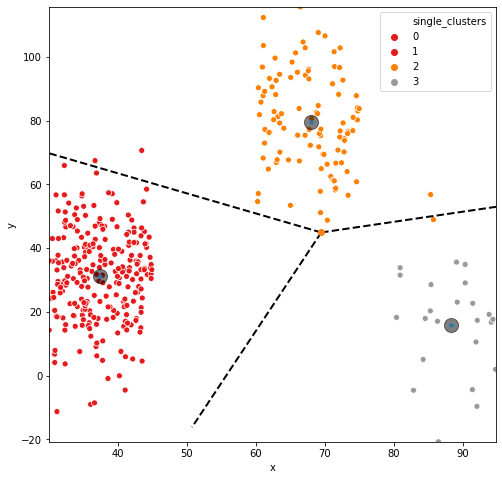

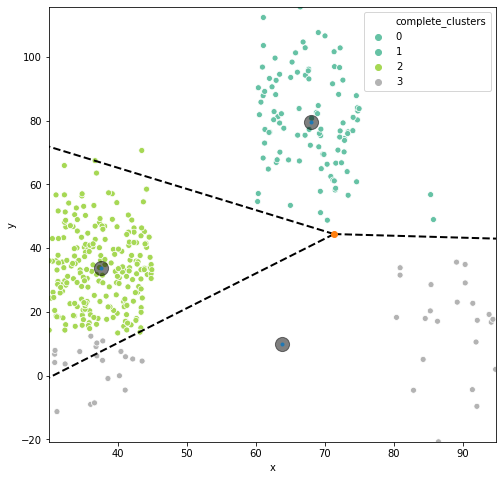

In [0]:
k = 3 
X = df_sizediff
z_single = linkage(X, 'single')
z_complete = linkage(X, 'complete')

single_clusters = fcluster(z_single, k, criterion='maxclust')
complete_clusters = fcluster(z_complete, k, criterion='maxclust')

X["single_clusters"]   = single_clusters
X["complete_clusters"] = complete_clusters
clusters = range(1,(k+1))
centers_single = []
centers_complete = []
for i in clusters:

  #single linkage
  sub = X.loc[X['single_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_single.append(list(center))


  #complete linkage
  sub = X.loc[X['complete_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_complete.append(list(center))

 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["single_clusters"],  palette="Set1",ax=ax)


lst0 = [item[0] for item in centers_single]
lst1 = [item[1] for item in centers_single]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

vor = Voronoi(centers_single) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 



min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["complete_clusters"],  palette="Set2",ax=ax)



lst0 = [item[0] for item in centers_complete]
lst1 = [item[1] for item in centers_complete]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

vor = Voronoi(centers_complete) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 


min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 

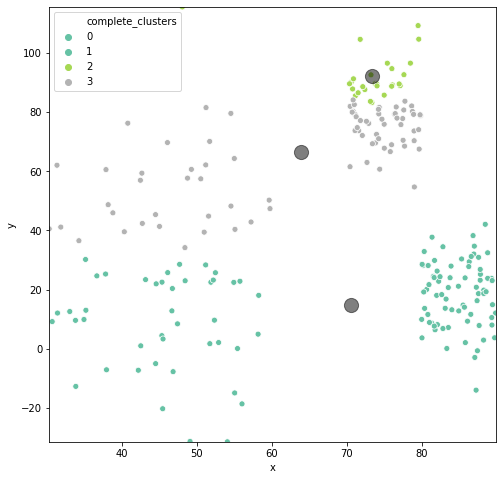

In [0]:
k = 3 
X = df_densedifv
z_single = linkage(X, 'single')
z_complete = linkage(X, 'complete')

single_clusters = fcluster(z_single, k, criterion='maxclust')
complete_clusters = fcluster(z_complete, k, criterion='maxclust')

X["single_clusters"]   = single_clusters
X["complete_clusters"] = complete_clusters
clusters = range(1,(k+1))
centers_single = []
centers_complete = []
for i in clusters:

  #single linkage
  sub = X.loc[X['single_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_single.append(list(center))


  #complete linkage
  sub = X.loc[X['complete_clusters'] == i]
  center = sub[["x","y"]].mean(axis=0)
  centers_complete.append(list(center))

 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["single_clusters"],  palette="Set1",ax=ax)

lst0 = [item[0] for item in centers_single]
lst1 = [item[1] for item in centers_single]
plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 




min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 


 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x=X['x'], y=X['y'], hue=X["complete_clusters"],  palette="Set2",ax=ax)



lst0 = [item[0] for item in centers_complete]
lst1 = [item[1] for item in centers_complete]

plt.scatter(lst0, lst1, c='black', s=200, alpha=0.5) 

min_x,max_x = min(X['x']),max(X['x'])  
min_y,max_y = min(X['y']),max(X['y'])  

plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 